In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dfdt=pd.read_csv('Clean_data.csv')

## Exploratory Data Analyst

### Based on Category

In [33]:
cat=dfdt['Category'].value_counts().sort_values(ascending=False)
cat.head()

FAMILY      1898
GAME         926
TOOLS        827
BUSINESS     419
MEDICAL      396
Name: Category, dtype: int64

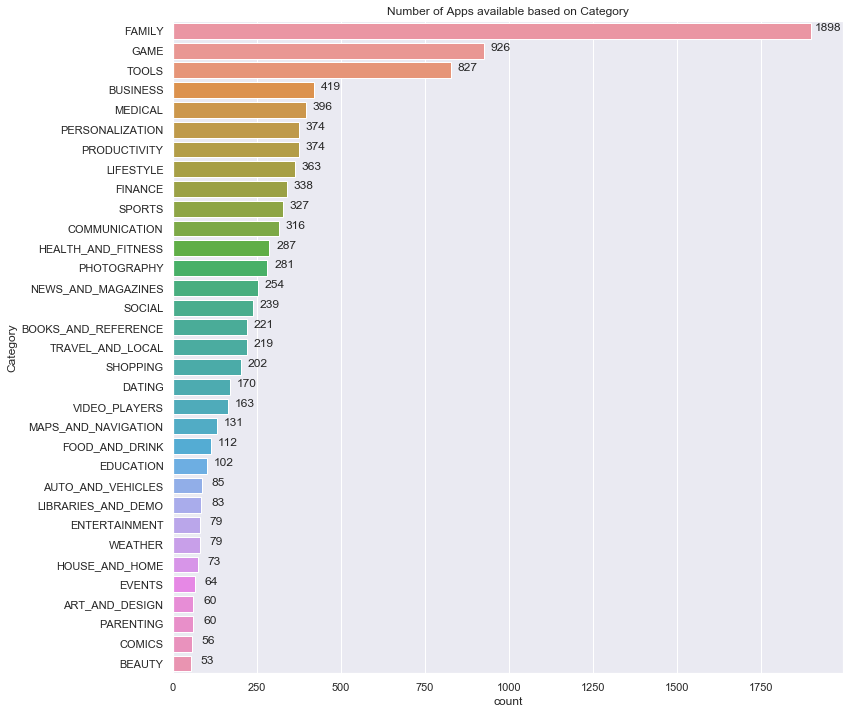

In [34]:
plt.figure(figsize=(12,12))
ax=sns.countplot(y='Category',data=dfdt,order = dfdt['Category'].value_counts().index)
ax.set_title("Number of Apps available based on Category")

for p in ax.patches:
    width = p.get_width()
    ax.text(width+50, p.get_y()+p.get_height()/2,width ,ha="center")

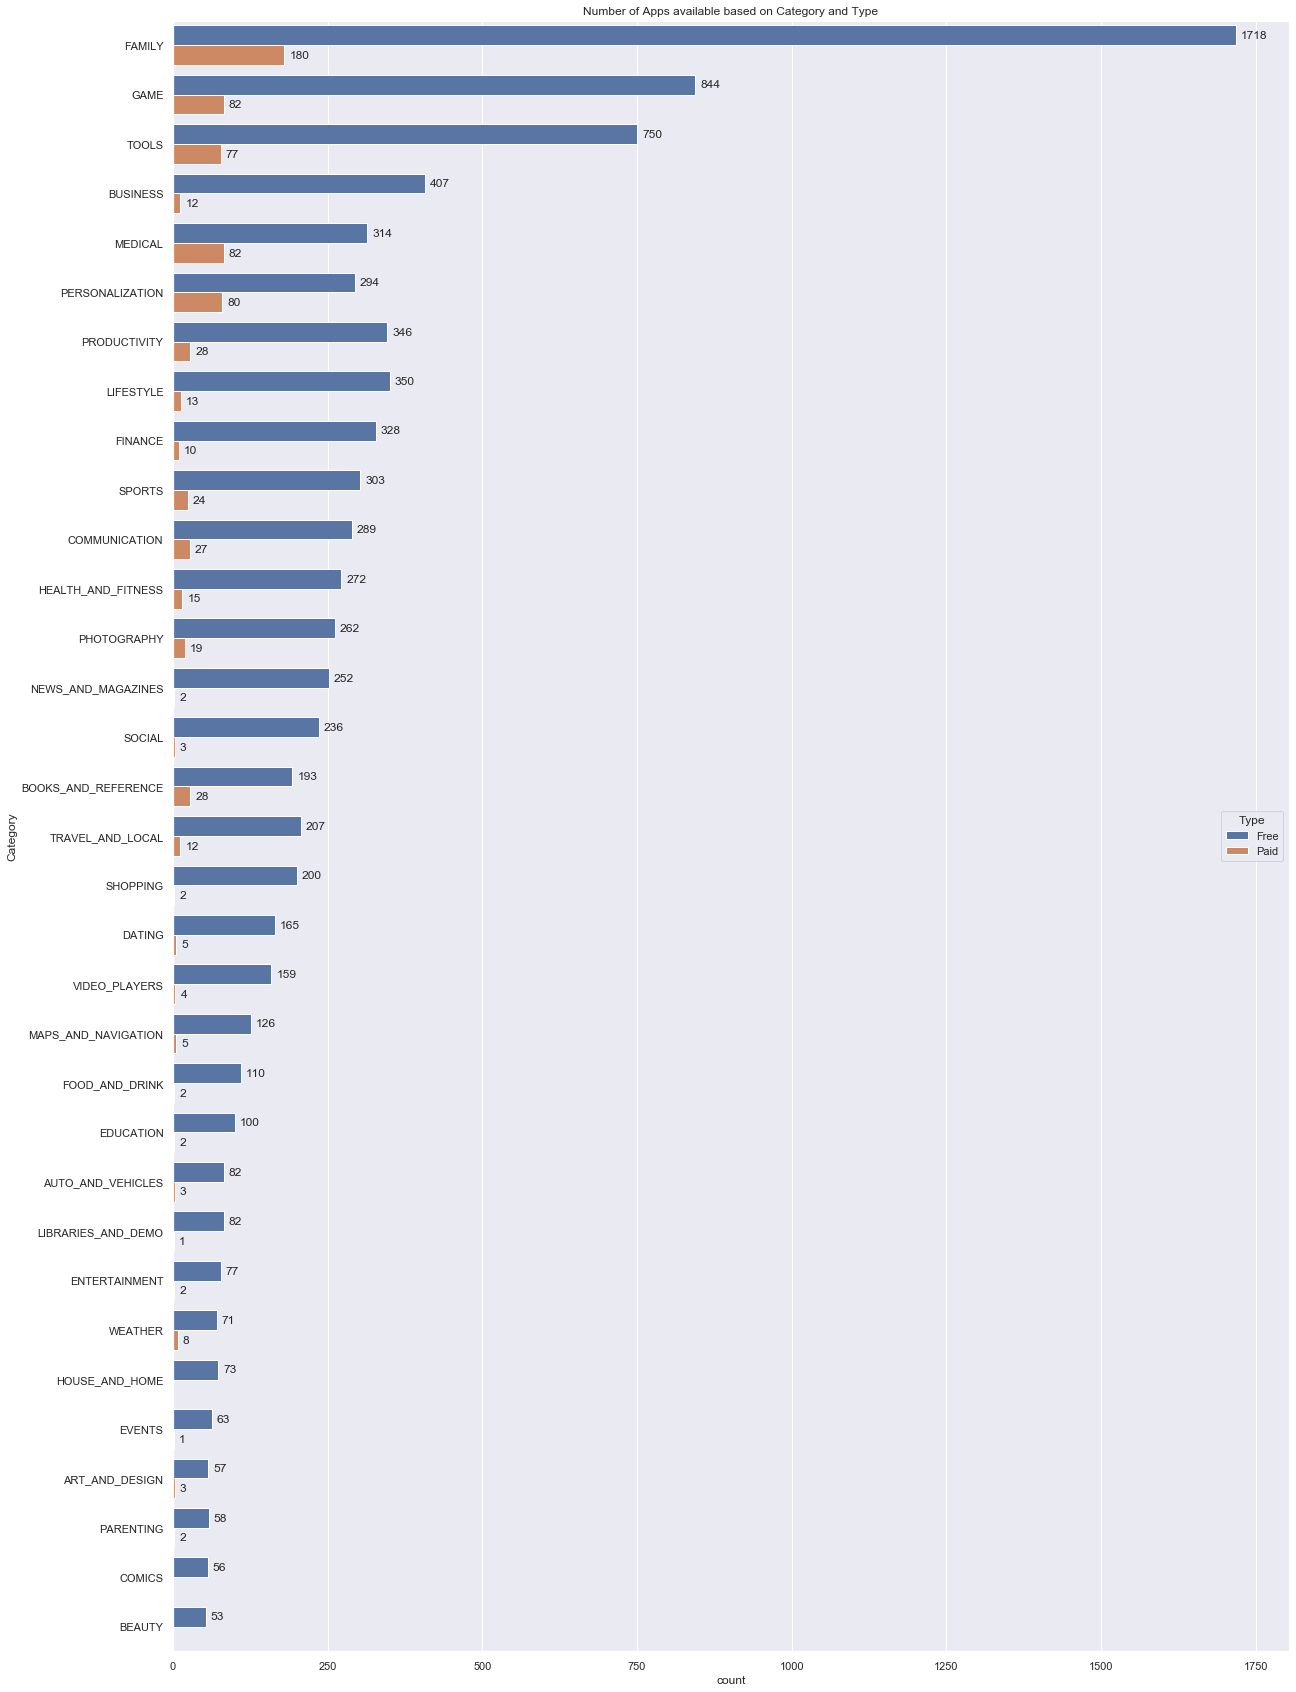

In [35]:
plt.figure(figsize=(20,30))
axtype=sns.countplot(y='Category',hue='Type',data=dfdt,order=dfdt['Category'].value_counts().index)
axtype.set_title('Number of Apps available based on Category and Type')

for p in axtype.patches:
    axtype.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(5, 0), textcoords='offset points', ha="left", va="center")


In [36]:
genre_meanrat = dfdt.groupby(['Category']).mean()['Rating'] 

genre_meanrat = round(genre_meanrat.sort_values(ascending=False),2) 

df_genre_meanrat = pd.DataFrame(genre_meanrat)
df_genre_meanrat.head()

,Rating
Category,
EVENTS,4.44
ART_AND_DESIGN,4.38
EDUCATION,4.35
BOOKS_AND_REFERENCE,4.35
PERSONALIZATION,4.33


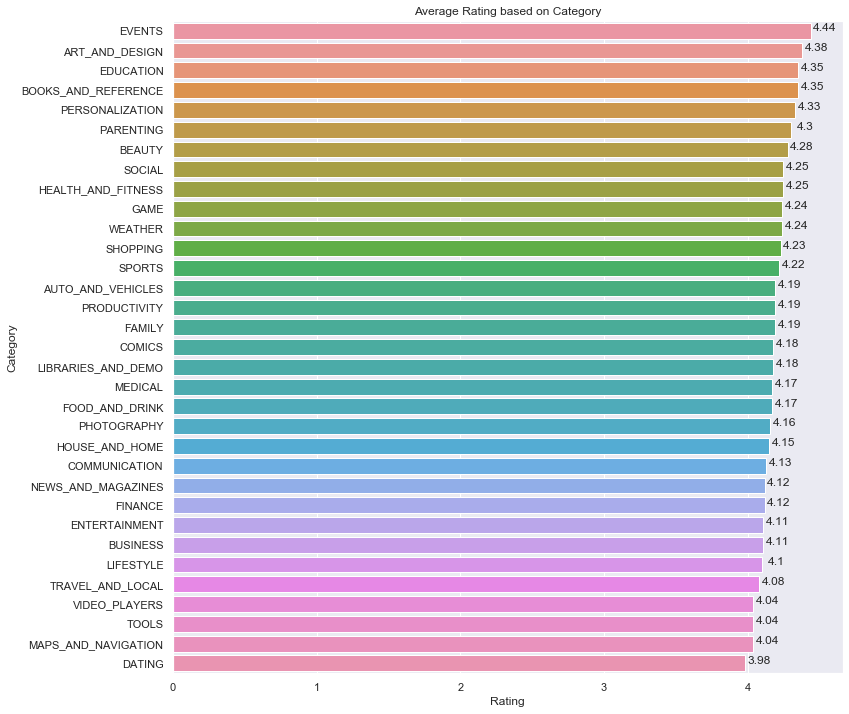

In [37]:
plt.figure(figsize=(12,12))
axrat=sns.barplot(x='Rating',y=df_genre_meanrat.index,data=df_genre_meanrat)
axrat.set_title("Average Rating based on Category")

for p in axrat.patches:
    width = p.get_width()
    axrat.text(width+0.1, p.get_y()+p.get_height()/2,width ,ha="center")

In [38]:
genre_meanrev = dfdt.groupby(['Category']).mean()['Reviews'] 

genre_meanrev = round(genre_meanrev.sort_values(ascending=False),0) 

df_genre_meanrev = pd.DataFrame(genre_meanrev)
df_genre_meanrev.head()

,Reviews
Category,
SOCIAL,953148.0
COMMUNICATION,904509.0
GAME,459222.0
VIDEO_PLAYERS,413036.0
PHOTOGRAPHY,375647.0


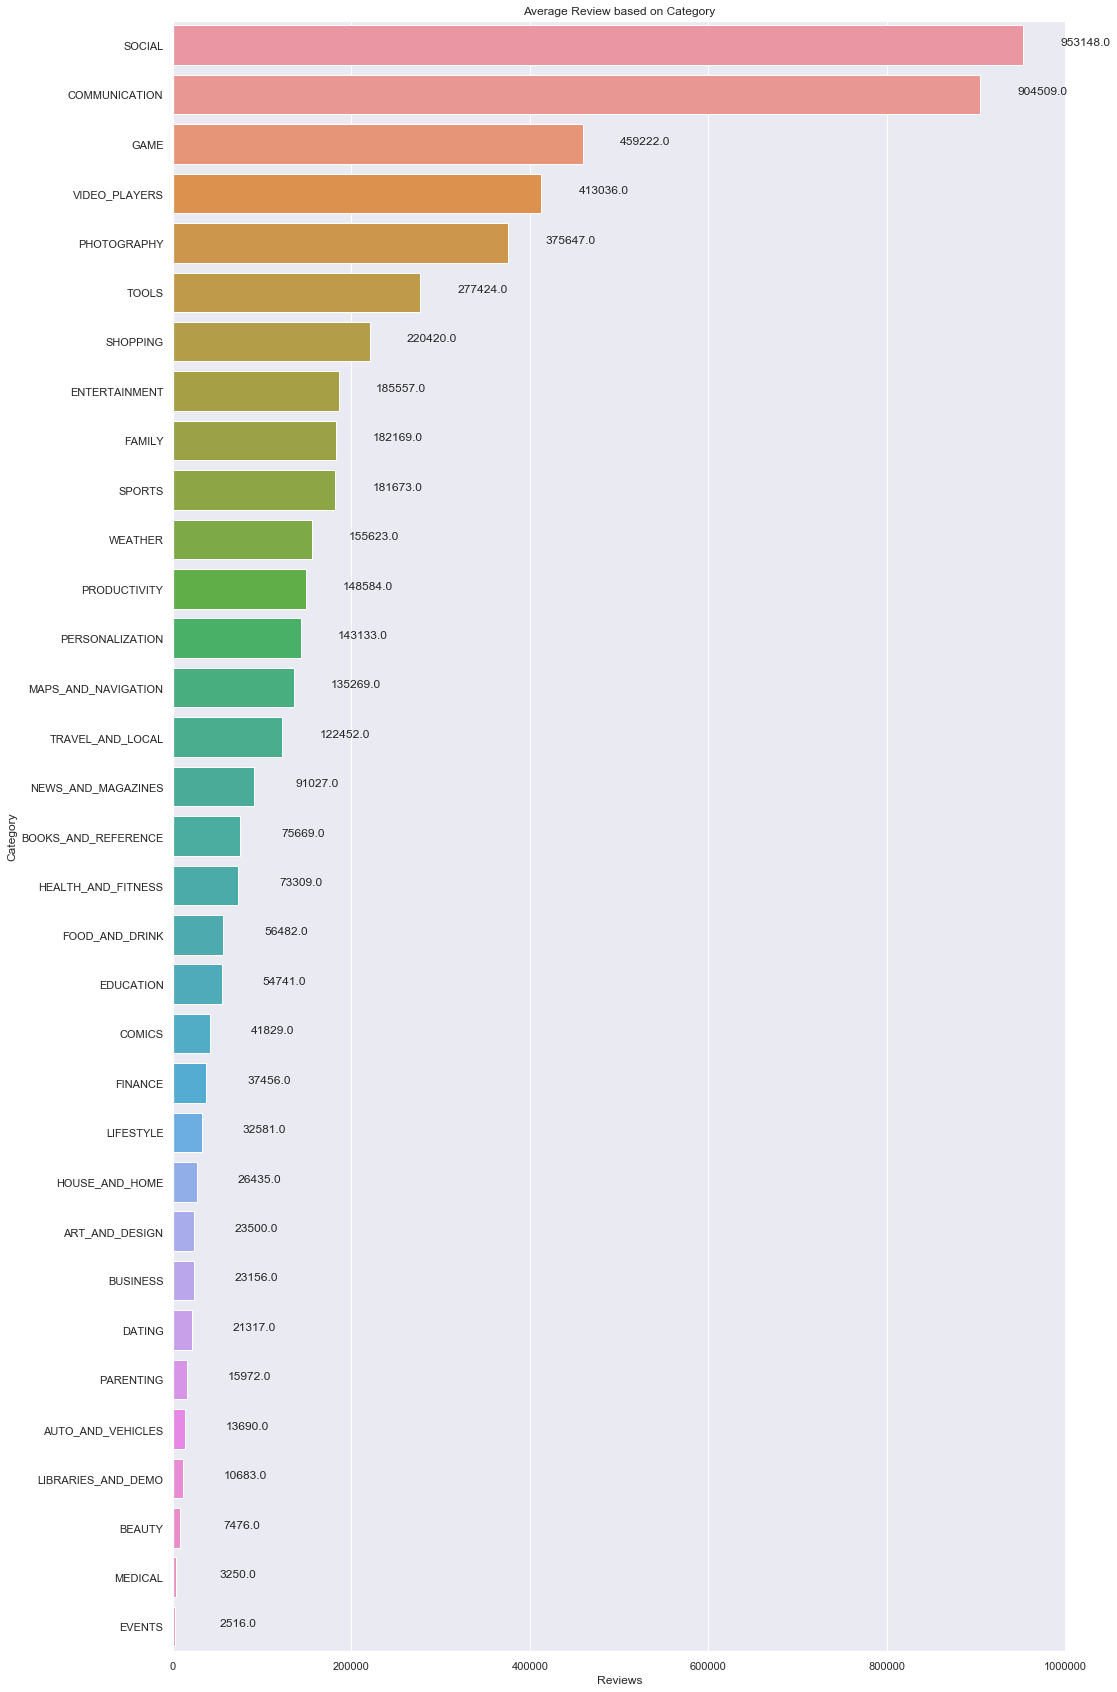

In [39]:
plt.figure(figsize=(16,30))
axrev=sns.barplot(x='Reviews',y=df_genre_meanrev.index,data=df_genre_meanrev)
axrev.set_title("Average Review based on Category")

for p in axrev.patches:
    width = p.get_width()
    axrev.text(width+70000, p.get_y()+p.get_height()/2,width ,ha="center")

In [40]:
genre_maxprice = dfdt.groupby(['Category']).max()['Price'] 

df_genre_maxprice = pd.DataFrame(genre_maxprice).sort_values('Price',ascending=False)
df_genre_maxprice.head()

,Price
Category,
MEDICAL,200.00
PRODUCTIVITY,154.99
EVENTS,109.99
BUSINESS,89.99
FAMILY,46.99


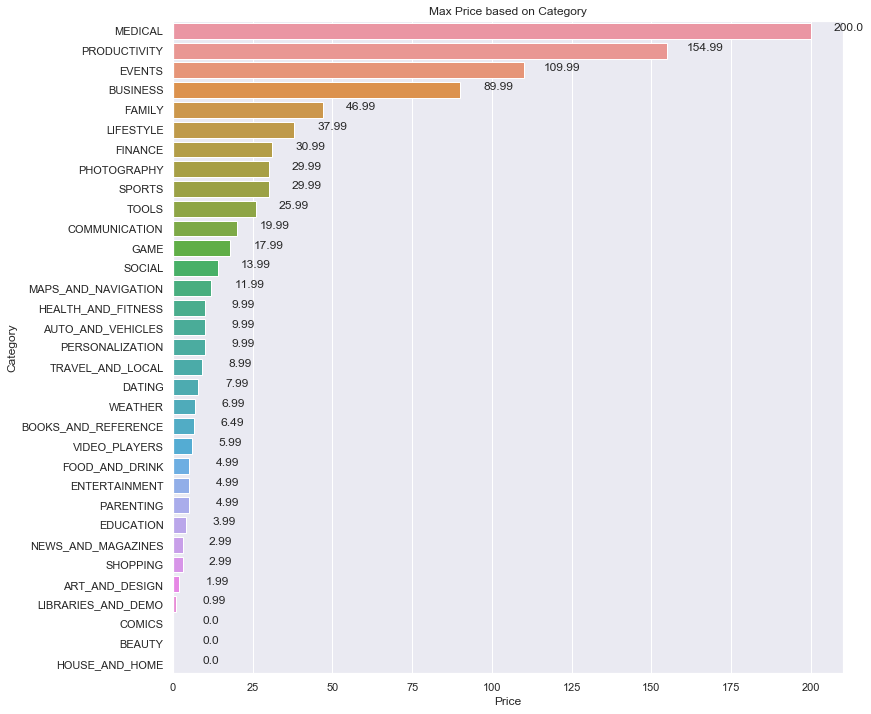

In [41]:
plt.figure(figsize=(12,12))
axpr=sns.barplot(x='Price',y=df_genre_maxprice.index,data=df_genre_maxprice)
axpr.set_title("Max Price based on Category")

for p in axpr.patches:
    width = p.get_width()
    axpr.text(width+12, p.get_y()+p.get_height()/2,width ,ha="center")

In [42]:
genre_install = dfdt.groupby(['Category']).mean()['Installs'] 

df_genre_install = pd.DataFrame(genre_install).sort_values('Installs',ascending=False)
df_genre_install.head()

,Installs
Category,
COMMUNICATION,3.493442e+07
VIDEO_PLAYERS,2.403069e+07
SOCIAL,2.296179e+07
PHOTOGRAPHY,1.657704e+07
PRODUCTIVITY,1.547618e+07


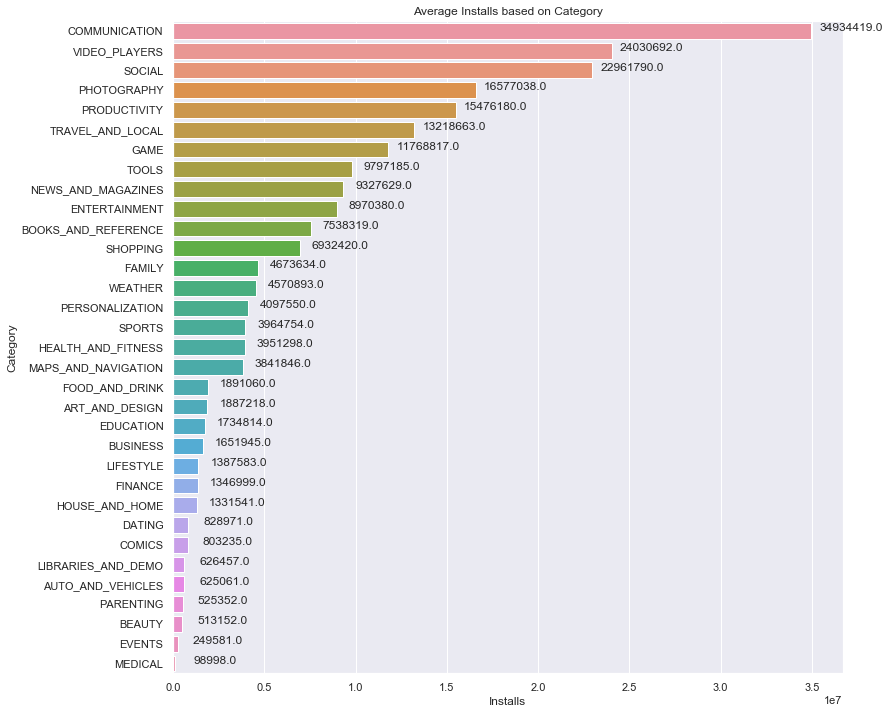

In [43]:

plt.figure(figsize=(12,12))
axin=sns.barplot(x='Installs',y=df_genre_install.index,data=df_genre_install)
axin.set_title("Average Installs based on Category")

for p in axin.patches:
    width = p.get_width()
    axin.text(width+2200000, p.get_y()+p.get_height()/2,round(width,0) ,ha="center")

### Based On Type

In [44]:
dtype=dfdt['Type'].value_counts()
dtype

Free    8897
Paid     734
Name: Type, dtype: int64

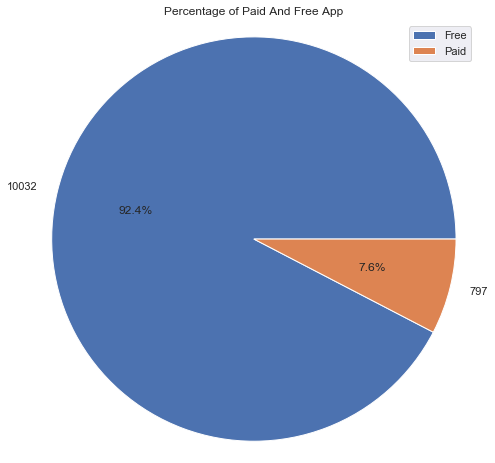

In [45]:
plt.figure(figsize=(8,8))
lbl=['10032','797']
plt.pie(dtype,labels=lbl,autopct='%1.1f%%',radius=1.5)
plt.legend(labels=['Free','Paid'])
plt.axis('equal')
plt.title('Percentage of Paid And Free App')
plt.show()

In [46]:
dfdt['profit'] = dfdt['Price']*dfdt['Installs']

In [47]:
most_profitpaid=dfdt.sort_values('profit',ascending=False).head(9)
most_profitpaid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated(days ago),Current Ver,Android Ver,profit
3163,Minecraft,FAMILY,4.5,2375336,28.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,29,1.5.2.1,Varies with device,69900000.0
2851,Hitman Sniper,GAME,4.6,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,302,1.7.110758,4.1 and up,9900000.0
6213,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,1511,1.08,3.0 and up,6990000.0
1994,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48.00,1000000,Paid,5.99,Everyone,Photography,289,1.3.1,4.1 and up,5990000.0
4378,Sleep as Android Unlock,LIFESTYLE,4.5,23966,0.87,1000000,Paid,5.99,Everyone,Lifestyle,317,20180608,4.0 and up,5990000.0
7599,DraStic DS Emulator,GAME,4.6,87766,12.00,1000000,Paid,4.99,Everyone,Action,1025,r2.5.0.3a,2.3 and up,4990000.0
2950,Weather Live,WEATHER,4.5,76593,13.00,500000,Paid,5.99,Everyone,Weather,535,Varies with device,Varies with device,2995000.0
1520,Card Wars - Adventure Time,FAMILY,4.3,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,1184,1.11.0,2.3.3 and up,2990000.0
7655,Bloons TD 5,FAMILY,4.6,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,301,3.16,2.3.3 and up,2990000.0


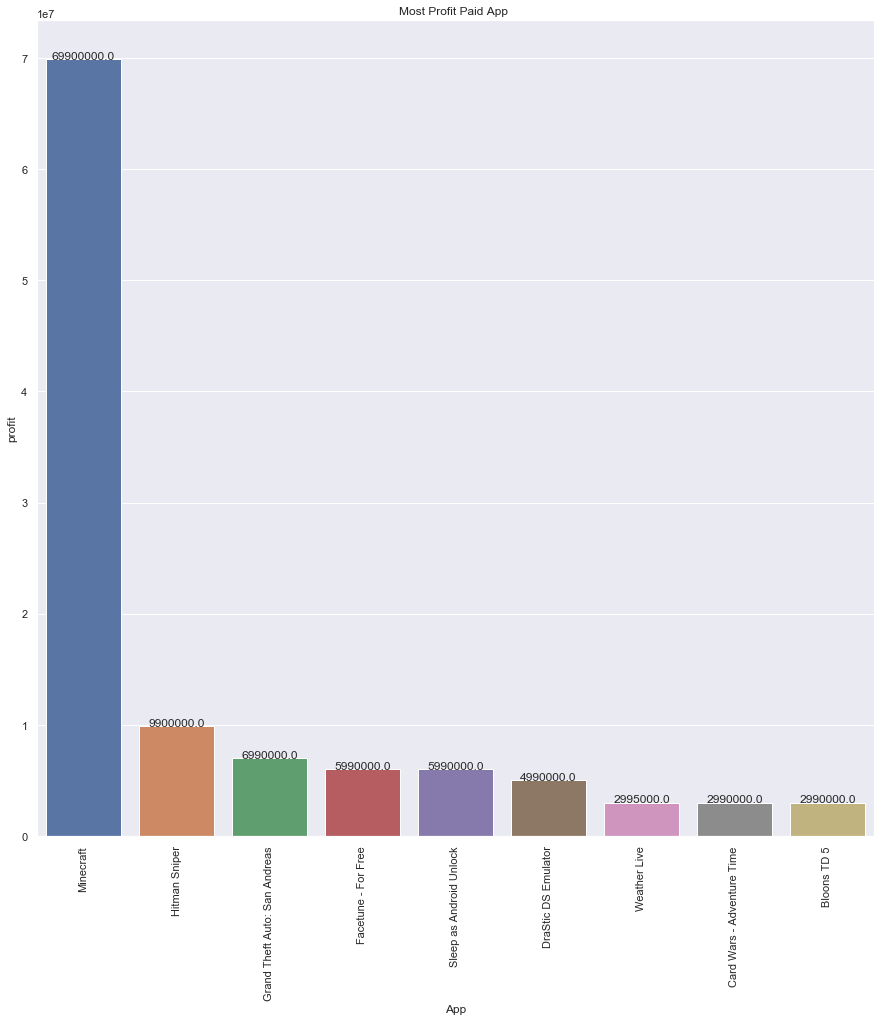

In [48]:
plt.figure(figsize=(15,15))
axprof=sns.barplot(x='App',y='profit',data=most_profitpaid)
axprof.set_xticklabels(most_profitpaid['App'].values,rotation=90)
axprof.set_title('Most Profit Paid App ')

for p in axprof.patches:
    height = p.get_height()
    axprof.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

C:\Users\Brain\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


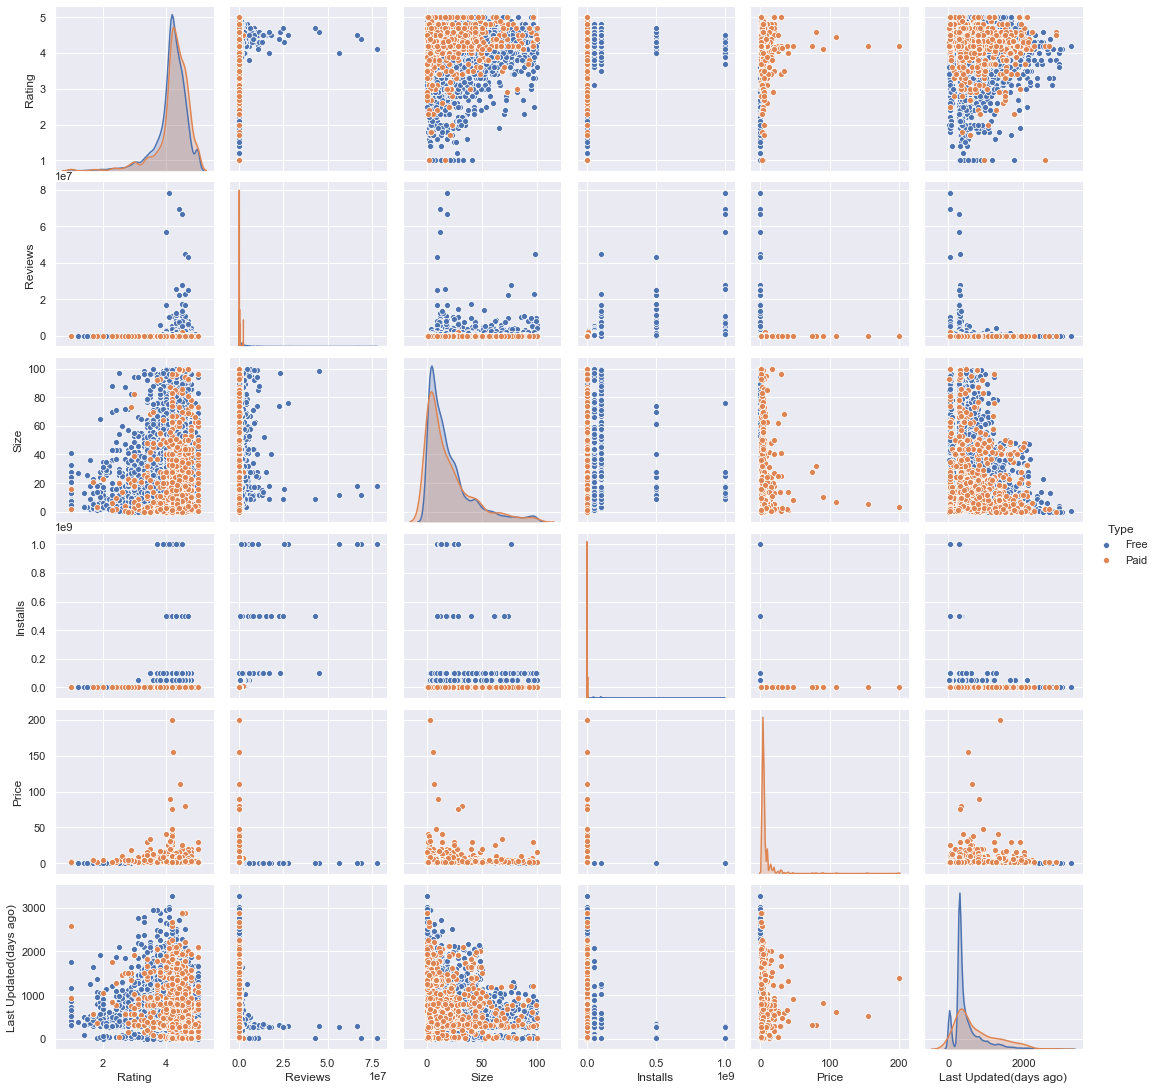

In [49]:
sns.pairplot(dfdt.drop('profit',axis=1),hue='Type')

### Based On Content Rating

In [50]:
dfdt['Content Rating'].value_counts()

Everyone           7877
Teen               1035
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

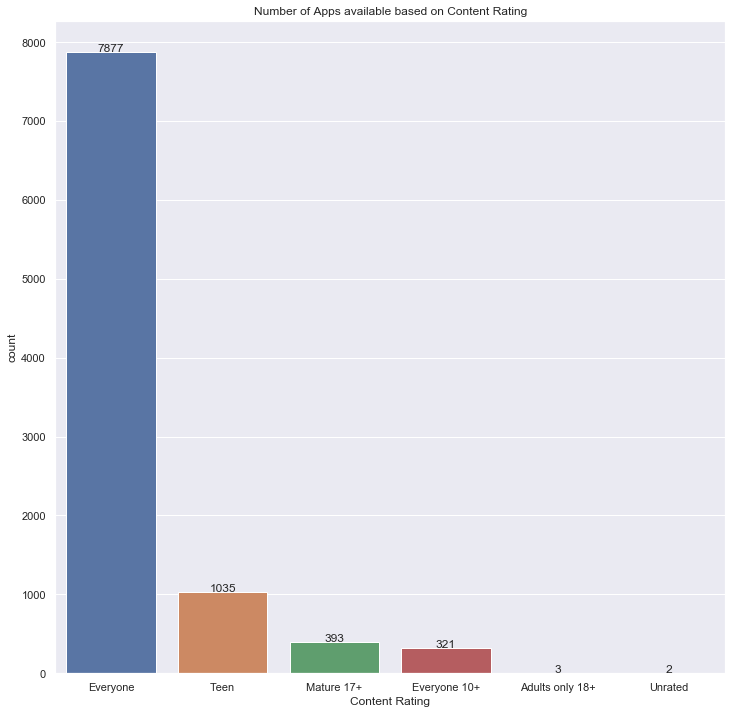

In [51]:
plt.figure(figsize=(12,12))
axcr=sns.countplot(x='Content Rating',data=dfdt,order = dfdt['Content Rating'].value_counts().index)
axcr.set_title("Number of Apps available based on Content Rating")

for p in axcr.patches:
    height = p.get_height()
    axcr.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

## Based On Installs

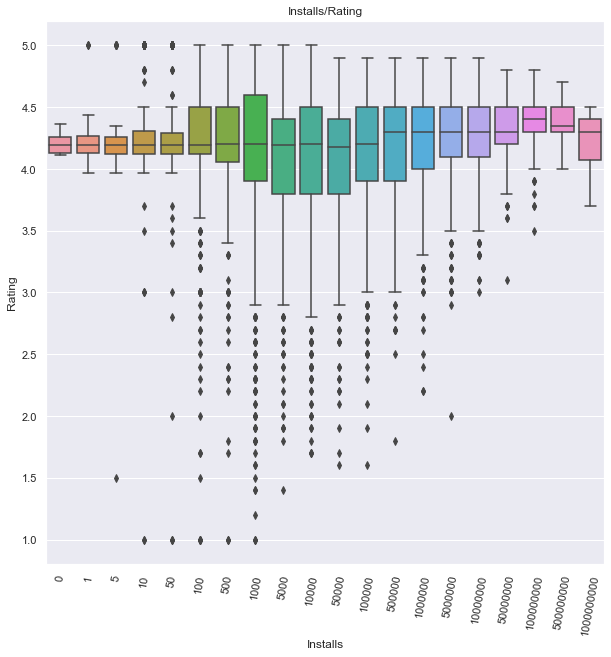

In [52]:
#boxplot plot installs/rates
ax = plt.figure(figsize=(10,10))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=dfdt)
plt.title("Installs/Rating")
plt.xticks(rotation=80)
plt.show()

terlihat bahwa Semakin besar installs, maka Rating juga memiliki nilai yang semakin besar.

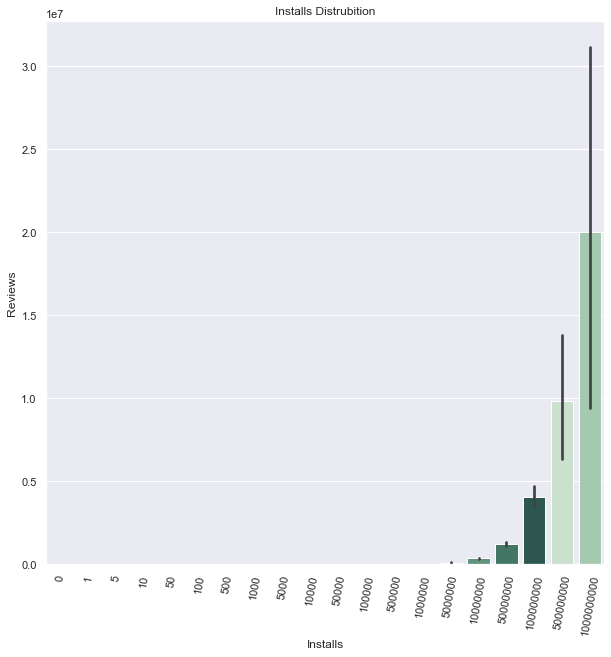

In [53]:
#histogram
plt.figure(figsize=(10,10))
sns.barplot(x=dfdt['Installs'],y=dfdt.Reviews,color='b',palette=sns.color_palette("ch:2.5,-.2,dark=.3"));
plt.title("Installs Distrubition")
plt.xticks(rotation=80)
plt.show()

In [54]:
## Most Installs
dfdt.sort_values('Installs',ascending=False).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated(days ago),Current Ver,Android Ver,profit
2913,Gmail,COMMUNICATION,4.3,4604324,12.0,1000000000,Free,0.0,Everyone,Communication,281,Varies with device,Varies with device,0.0
2726,Instagram,SOCIAL,4.5,66509917,18.0,1000000000,Free,0.0,Teen,Social,283,Varies with device,Varies with device,0.0
2970,Hangouts,COMMUNICATION,4.0,3419464,12.0,1000000000,Free,0.0,Everyone,Communication,293,Varies with device,Varies with device,0.0
4656,Google Play Games,FAMILY,4.3,7168735,28.0,1000000000,Free,0.0,Teen,Entertainment,298,Varies with device,Varies with device,0.0
2544,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,16.0,1000000000,Free,0.0,Teen,Video Players & Editors,277,Varies with device,Varies with device,0.0
2967,Google,TOOLS,4.4,8021623,9.0,1000000000,Free,0.0,Everyone,Tools,28,Varies with device,Varies with device,0.0
2961,Google+,SOCIAL,4.2,4828372,18.0,1000000000,Free,0.0,Teen,Social,288,Varies with device,Varies with device,0.0
2921,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,12.0,1000000000,Free,0.0,Everyone,Communication,282,Varies with device,Varies with device,0.0
4195,Google Photos,PHOTOGRAPHY,4.5,10847682,17.0,1000000000,Free,0.0,Everyone,Photography,282,Varies with device,Varies with device,0.0
2915,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613,25.0,1000000000,Free,0.0,Everyone,Travel & Local,283,Varies with device,Varies with device,0.0


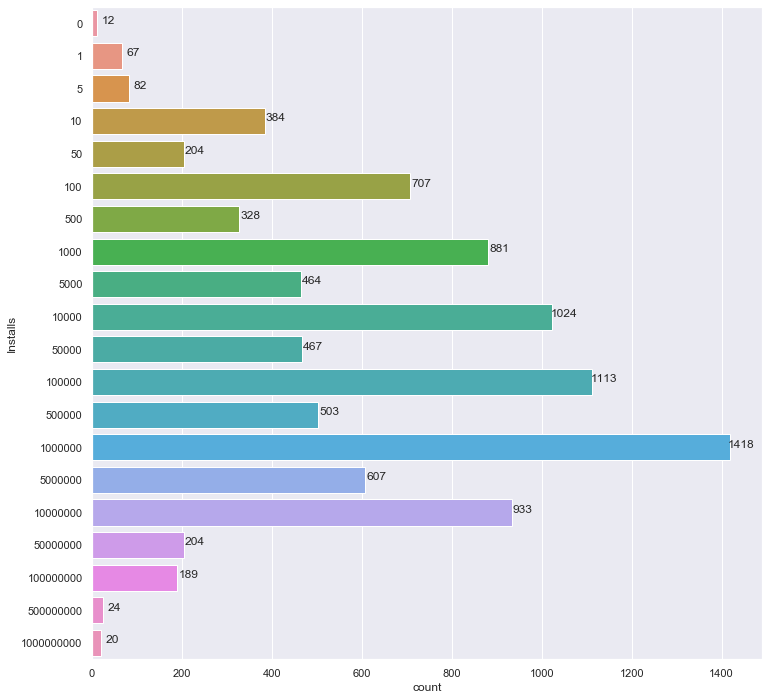

In [55]:
plt.figure(figsize=(12,12))
axins=sns.countplot(y='Installs',data=dfdt)

for p in axins.patches:
    width = p.get_width()
    axins.text(width+25, p.get_y()+p.get_height()/2,round(width,0) ,ha="center")

### Based on Rating

Text(0.5, 1.0, 'Rating Distribution')

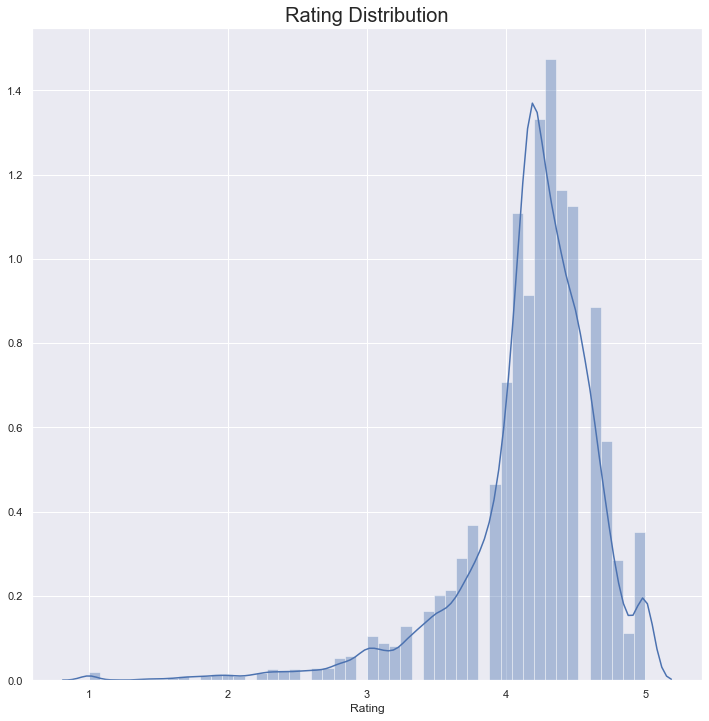

In [56]:
plt.figure(figsize=(12,12))
sns.distplot(dfdt['Rating'])
plt.title('Rating Distribution',size = 20)